In [57]:
!pip3 install biopython

In [58]:
from google.colab import files
uploaded = files.upload()

Saving uniprot_sprot.fasta to uniprot_sprot.fasta


In [59]:
from Bio import SeqIO
import gzip
import pandas as pd

sequences = []

with open("uniprot_sprot.fasta", "r") as handle:
  for record in SeqIO.parse(handle, "fasta"):
    uniprot_id = record.id.split('|')[1] if '|' in record.id else record.uniprot_id
    sequence = str(record.seq)
    sequences.append({"id": uniprot_id, "sequence": sequence})

df = pd.DataFrame(sequences)
df.to_csv("protein_sequences.csv", index=False)

df.head()

,id,sequence
0,Q6GZX4,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...
1,Q6GZX3,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...
2,Q197F8,MASNTVSAQGGSNRPVRDFSNIQDVAQFLLFDPIWNEQPGSIVPWK...
3,Q197F7,MYQAINPCPQSWYGSPQLEREIVCKMSGAPHYPNYYPVHPNALGGA...
4,Q6GZX2,MARPLLGKTSSVRRRLESLSACSIFFFLRKFCQKMASLVFLNSPVY...


In [60]:
!git config --global user.email "lionelrozario98@gmail.com"
!git config --global user.name "midnightoatmeal"

In [61]:
!git clone https://github.com/midnightoatmeal/prot2func.git

Cloning into 'prot2func'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), done.


In [62]:
import shutil
shutil.move("protein_sequences.csv", "/content/prot2func/protein_sequences.csv")

'/content/prot2func/protein_sequences.csv'

In [63]:
%cd /content/prot2func/
!git add .
!git commit -m "Add protein sequence data"
!git push

/content/prot2func
hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> prot2func
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached prot2func
hint: 
hint: See "git help submodule" for more information.
[main 1c36b4d] Add protein sequence data
 6 files changed, 4323928 insertions(+)
 create mode 100644 labeled_protein_data.csv
 create mode 100644 labeled_protein_data_2.csv
 create mode 100644 labled_protein_data.csv
 create mode 160000 prot2func
 create mode 100644 protein_sequences_with_labels.csv
 create mode 100644 uniprot_sprot.fasta
fatal: could not read Username for 'https://github.com': No such device or address


In [64]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/jammy.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Detected apt version as 2.4.14
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... Packagecloud gpg key imported to /etc/apt/keyrings/github_git-lfs-archive-keyring.gpg
done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.6.1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
Updated Git hooks.
Git LFS initialized.


In [65]:
!git rm --cached protein_sequences.csv

rm 'protein_sequences.csv'


In [66]:
!git reset --hard HEAD~2

HEAD is now at e66ef5c Initial commit


In [67]:
!git lfs install
!git lfs track "protein_sequences.csv"
!git add .gitattributes
!git add protein_sequences.csv
!git commit -m "Add protein sequences using git lfs"

Updated Git hooks.
Git LFS initialized.
Tracking "protein_sequences.csv"
[main 9598725] Add protein sequences using git lfs
 2 files changed, 4 insertions(+)
 create mode 100644 .gitattributes
 create mode 100644 protein_sequences.csv


In [69]:
import requests

def fetch_uniprot_info(uniprot_id):
  url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
  response = requests.get(url)
  if response.status_code != 200:
    return None
  data = response.json()

  # try to extract enzyme classification or functional annotation
  ec_numbers = []
  for comment in data.get('comments', []):
    if comment['commentType'] == 'FUNCTION':
      text = comment['texts'][0]['value']
      return text
  return None


In [70]:
import requests
url = "https://rest.uniprot.org/uniprotkb/P00374.json"  # Alcohol dehydrogenase
r = requests.get(url)
data = r.json()

for comment in data.get('comments', []):
    print(comment.get('commentType'))
    if comment.get('commentType') == 'CATALYTIC ACTIVITY':
        print(comment)

FUNCTION
CATALYTIC ACTIVITY
{'commentType': 'CATALYTIC ACTIVITY', 'reaction': {'name': '(6S)-5,6,7,8-tetrahydrofolate + NADP(+) = 7,8-dihydrofolate + NADPH + H(+)', 'reactionCrossReferences': [{'database': 'Rhea', 'id': 'RHEA:15009'}, {'database': 'ChEBI', 'id': 'CHEBI:15378'}, {'database': 'ChEBI', 'id': 'CHEBI:57451'}, {'database': 'ChEBI', 'id': 'CHEBI:57453'}, {'database': 'ChEBI', 'id': 'CHEBI:57783'}, {'database': 'ChEBI', 'id': 'CHEBI:58349'}], 'ecNumber': '1.5.1.3', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00660'}, {'evidenceCode': 'ECO:0000269', 'source': 'PubMed', 'id': '12096917'}, {'evidenceCode': 'ECO:0000269', 'source': 'PubMed', 'id': '15039552'}, {'evidenceCode': 'ECO:0000269', 'source': 'PubMed', 'id': '17569517'}, {'evidenceCode': 'ECO:0000269', 'source': 'PubMed', 'id': '19196009'}, {'evidenceCode': 'ECO:0000269', 'source': 'PubMed', 'id': '19478082'}, {'evidenceCode': 'ECO:0000269', 'source': 'PubMed', 'id': '21876184'}, {

In [71]:
import requests

def is_enzyme(uniprot_id):
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
    try:
        r = requests.get(url)
        if r.status_code != 200:
            return None
        data = r.json()

        for comment in data.get('comments', []):
            if comment.get('commentType') == 'CATALYTIC ACTIVITY':
                if 'reaction' in comment:
                    ec_number = comment['reaction'].get('ecNumber')
                    if ec_number:
                        return 1  # Enzyme
        return 0  # Not an enzyme
    except Exception as e:
        return None

In [72]:
from tqdm import tqdm
import time

df_sample = df.head(500)
enzyme_labels = []

for pid in tqdm(df_sample['id']):
  label = is_enzyme(pid)
  enzyme_labels.append(label)
  time.sleep(0.1)
df_sample['is_enzyme'] = enzyme_labels
df_sample.to_csv("labeled_protein_data.csv", index=False)

100%|██████████| 500/500 [05:33<00:00,  1.50it/s]
<ipython-input-72-6ec560d59fba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['is_enzyme'] = enzyme_labels


In [73]:
df = pd.read_csv("labeled_protein_data.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         500 non-null    object
 1   sequence   500 non-null    object
 2   is_enzyme  500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


,is_enzyme
count,500.000000
mean,0.026000
std,0.159295
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [74]:
df['is_enzyme'].value_counts()

,count
is_enzyme,
0,487
1,13


In [75]:
df_more = df[500:1500].copy()


In [76]:
df = pd.read_csv("protein_sequences.csv")
df_more = df[500:1000].copy()

In [77]:
df_sample = df_more.copy()

In [78]:
print(len(df_sample))
print(df_sample['id'].head())

500
500    Q9MB95
501    Q06402
502    Q00257
503    Q00379
504    Q7XQ85
Name: id, dtype: object


In [79]:
from tqdm import tqdm
import time

df_sample = df_more.head(500).copy()

# Safety check
if 'id' not in df_sample.columns:
    raise ValueError("Missing 'id' column!")

enzyme_labels = []

for pid in tqdm(df_sample['id']):
    label = is_enzyme(pid)
    enzyme_labels.append(label)
    time.sleep(0.1)

df_sample['is_enzyme'] = enzyme_labels
df_sample.to_csv("labeled_protein_data_2.csv", index=False)

100%|██████████| 500/500 [05:34<00:00,  1.50it/s]


In [80]:
df_more.head(20)

,id,sequence
500,Q9MB95,MGSSSATANRFLLSKIATSEGHGENSPYFDGWKAYDRNPFHPTKNP...
501,Q06402,MGLPGKNKGAVLSKIATNNQHGENSEYFDGWKAYDKDPFHLSRNPH...
502,Q00257,MKMLSTKATCNSHGQDSSYFLGWEAYENNPFHHTSNPNGIIQMGLA...
503,Q00379,MGFHQIDERNQALLSKIAIDDGHGENSAYFDGWKAYDNNPFHPENN...
504,Q7XQ85,MAYQGIDLLSTKAAGDDHGENSSYFDGWKAYDTNPFDLRHNRGGVI...
505,P18485,MGFEIAKTNSILSKLATNEEHGENSPYFDGWKAYDSDPFHPLKNPN...
506,A0A0P0WIY3,MVGRMLSSPEPTLSTMAMSAAHGEDSPYFAGWRAYDEDPYDPITNP...
507,Q42881,MKLLSEKATCNSHGQDSSYFLGWQEYEKNPYDEIQNPKGIIQMGLA...
508,Q43309,MVQLSRKATCNSHGQVSSYFLGWEEYEKNPYDVTKNPQGIIQMGLA...
509,Q5W6F9,MGVKLLADGCAGASSSPALSRVATSAAHGEGSPYFAGWKAYDEDPY...


In [81]:
df = pd.read_csv("protein_sequences.csv")
print(df.shape)

(573230, 2)


In [82]:
df_more = df[500:1000].copy()

In [83]:
from tqdm import tqdm
import time

enzyme_labels = []

for pid in tqdm(df_more['id']):
  label = is_enzyme(pid)
  enzyme_labels.append(label)
  time.sleep(0.1)
df_more['is_enzyme'] = enzyme_labels
df_more.to_csv("labeled_protein_data_2.csv", index=False)

100%|██████████| 500/500 [05:26<00:00,  1.53it/s]


In [84]:
df_more['is_enzyme'].value_counts()

,count
is_enzyme,
0,360
1,140


In [85]:
df = pd.read_csv("protein_sequences.csv")
df_sample = df.head(500).copy()

In [86]:
from tqdm import tqdm
import time

enzyme_labels = []
for pid in tqdm(df_sample['id']):
  label = is_enzyme(pid)
  enzyme_labels.append(label)
  time.sleep(0.1)
df_sample['is_enzyme'] = enzyme_labels
df_sample.to_csv("labled_protein_data.csv", index=False)

100%|██████████| 500/500 [05:26<00:00,  1.53it/s]


In [87]:
df1 = pd.read_csv("labled_protein_data.csv")
df2 = pd.read_csv("labeled_protein_data_2.csv")

print(df1.shape)
print(df2.shape)

(500, 3)
(500, 3)


In [88]:
df1 = pd.read_csv("labeled_protein_data.csv")
df2 = pd.read_csv("labeled_protein_data_2.csv")
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined = df_combined.dropna(subset=["is_enzyme"])
df_combined["is_enzyme"] = df_combined["is_enzyme"].astype(int)

In [89]:
import pandas as pd
import time
from tqdm import tqdm

# Load full dataset
df = pd.read_csv("protein_sequences.csv")

# Take the first 500 and copy
df_sample = df.head(500).copy()

# Reuse your is_enzyme() function
enzyme_labels = []

for pid in tqdm(df_sample['id']):
    label = is_enzyme(pid)
    enzyme_labels.append(label)
    time.sleep(0.1)

df_sample['is_enzyme'] = enzyme_labels

# Save the newly labeled file
df_sample.to_csv("labeled_protein_data.csv", index=False)

100%|██████████| 500/500 [05:25<00:00,  1.53it/s]


In [90]:
df1 = pd.read_csv("labeled_protein_data.csv")
df2 = pd.read_csv("labeled_protein_data_2.csv")
df_combined = pd.concat([df1, df2], ignore_index=True)
print(df_combined.shape)  # should be (1000, 3)

(1000, 3)


In [92]:
from collections import Counter
import pandas as pd

AMINO_ACIDS = list("ACDEFGHIKLMNPQRSTVWY")

def aa_composition(seq):
  count = Counter(seq)
  total = len(seq)
  return [count.get(aa, 0) / total for aa in AMINO_ACIDS]

df_features = df_combined.copy()
df_features[AMINO_ACIDS] = df_features["sequence"].apply(lambda x: pd.Series(aa_composition(x)))


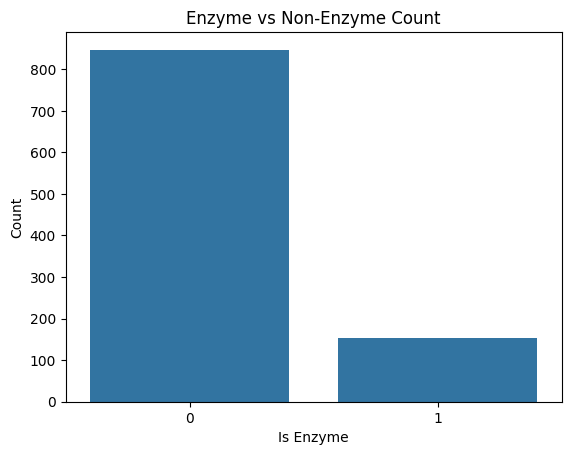

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="is_enzyme", data=df_features)
plt.title("Enzyme vs Non-Enzyme Count")
plt.xlabel("Is Enzyme")
plt.ylabel("Count")
plt.show()

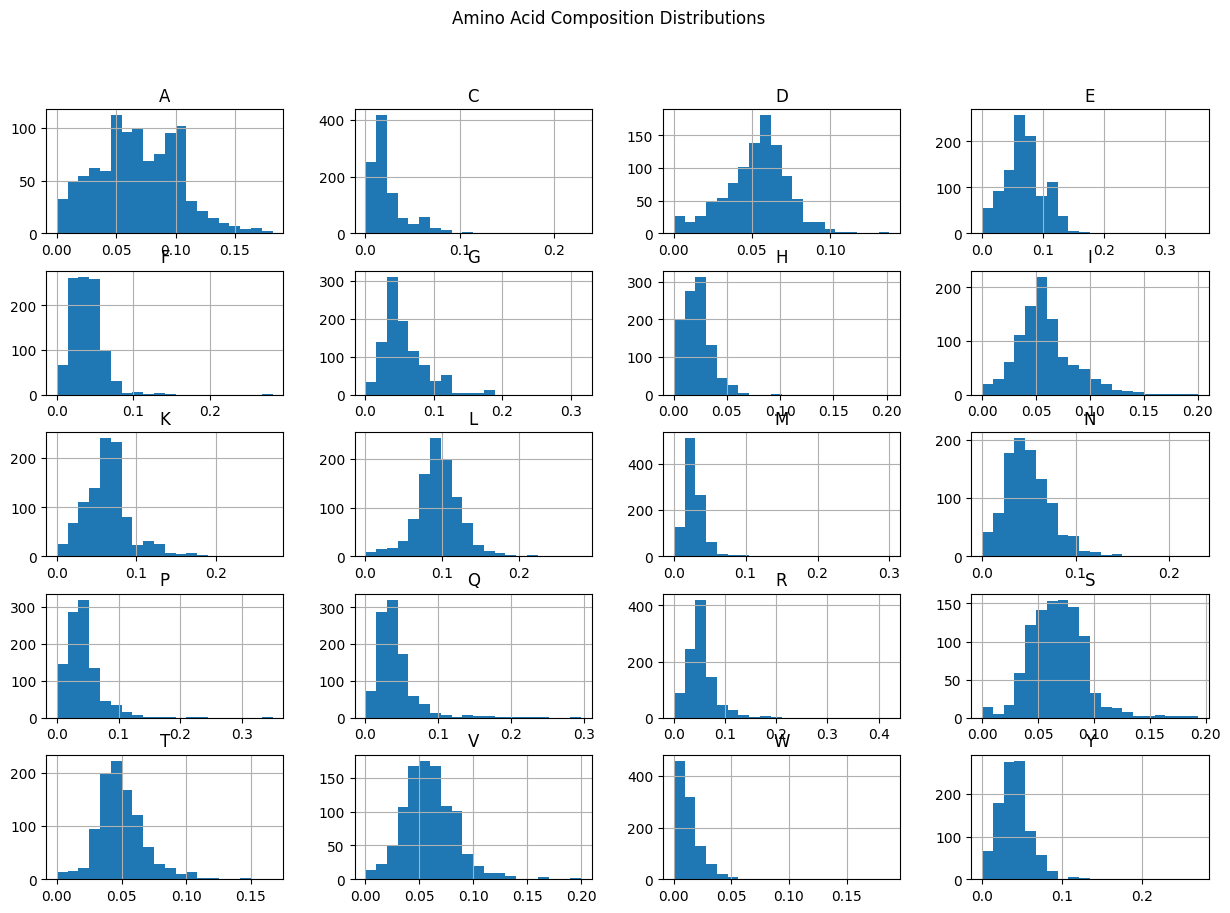

In [95]:
df_features[AMINO_ACIDS].hist(figsize=(15, 10), bins=20)
plt.suptitle("Amino Acid Composition Distributions")
plt.show()

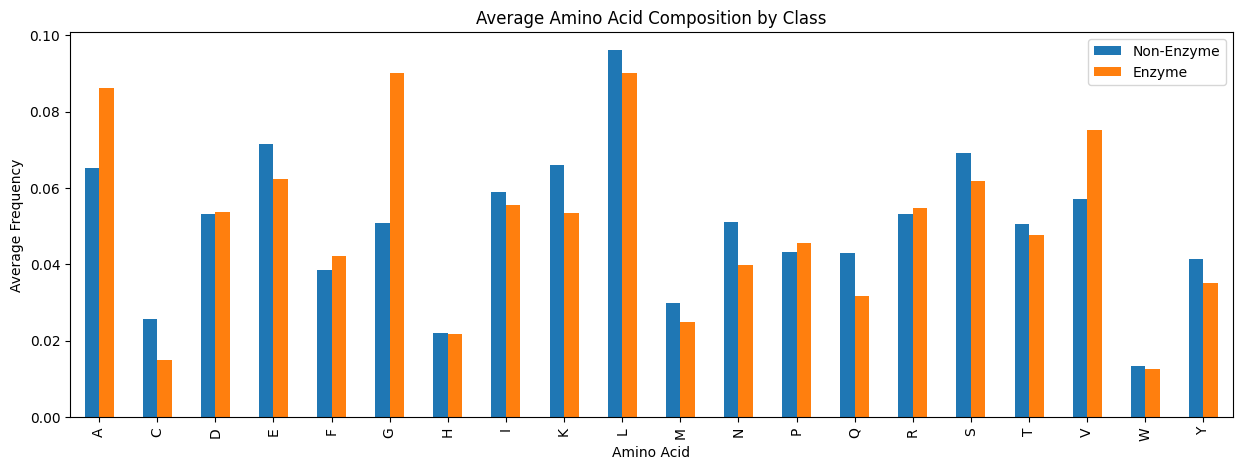

In [96]:
avg_comp = df_features.groupby("is_enzyme")[AMINO_ACIDS].mean().T
avg_comp.plot(kind="bar", figsize=(15, 5))
plt.title("Average Amino Acid Composition by Class")
plt.xlabel("Amino Acid")
plt.ylabel("Average Frequency")
plt.legend(["Non-Enzyme", "Enzyme"])
plt.show()

In [97]:
from sklearn.model_selection import train_test_split

X = df_features[AMINO_ACIDS]
y = df_features["is_enzyme"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
# convert data to tensors

import torch
from torch.utils.data import TensorDataset, DataLoader

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [101]:
import torch.nn as nn
import torch.nn.functional as F

class EnzymeClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(20, 64)
    self.fc2 = nn.Linear(64, 32)
    self.out = nn.Linear(32, 2)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.out(x)


In [103]:
model_2 = EnzymeClassifier()
model_2

EnzymeClassifier(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=2, bias=True)
)

In [104]:
model_2.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0410, -0.1476,  0.2080,  ..., -0.0241, -0.1369,  0.1540],
                      [-0.1473, -0.0169,  0.2216,  ..., -0.0375, -0.1823, -0.0753],
                      [ 0.0144,  0.0473, -0.0789,  ..., -0.2203, -0.1355, -0.0128],
                      ...,
                      [-0.0488, -0.0619,  0.2074,  ..., -0.1802,  0.1857,  0.1643],
                      [-0.2169, -0.1247,  0.0188,  ..., -0.0551, -0.1546,  0.0597],
                      [-0.1639,  0.1408, -0.1742,  ...,  0.0760, -0.1133,  0.1541]])),
             ('fc1.bias',
              tensor([-0.1309,  0.0898,  0.0059, -0.0417,  0.0076, -0.0474,  0.1032,  0.0107,
                      -0.0422,  0.1092, -0.0110, -0.0662,  0.1191, -0.0829, -0.0477, -0.0964,
                       0.0637,  0.2169,  0.1400, -0.1837,  0.1026,  0.2030, -0.0347,  0.0665,
                       0.2205, -0.1009,  0.0097,  0.0110, -0.0588,  0.0032,  0.1974, -0.0925,
                       0.0532, -0.02

In [105]:
model = EnzymeClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
  model.train()
  total_loss = 0
  for xb, yb in train_loader:
    pred = model(xb)
    loss = loss_fn(pred, yb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f"Epoch {epoch+1}, loss: {total_loss:.4f}")

Epoch 1, loss: 15.5039
Epoch 2, loss: 13.1869
Epoch 3, loss: 11.1452
Epoch 4, loss: 10.5861
Epoch 5, loss: 10.5612
Epoch 6, loss: 10.4999
Epoch 7, loss: 10.4306
Epoch 8, loss: 10.3792
Epoch 9, loss: 10.2836
Epoch 10, loss: 10.1962
Epoch 11, loss: 10.0914
Epoch 12, loss: 9.9736
Epoch 13, loss: 9.8301
Epoch 14, loss: 9.6838
Epoch 15, loss: 9.5342
Epoch 16, loss: 9.3001
Epoch 17, loss: 9.0728
Epoch 18, loss: 8.8039
Epoch 19, loss: 8.5540
Epoch 20, loss: 8.3271


In [107]:
!pip3 install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [108]:
import torchmetrics
from torchmetrics import Accuracy, Precision, Recall, F1Score

accuracy = Accuracy(task="binary")
precision = Precision(task="binary")
recall = Recall(task="binary")
f1 = F1Score(task="binary")

In [109]:
model_2.eval()

all_preds = []
all_labels = []

with torch.inference_mode():
  for xb, yb in test_loader:
    logits = model_2(xb)
    preds = torch.argmax(logits, dim=1)

    all_preds.append(preds)
    all_labels.append(yb)

all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

acc = accuracy(all_preds, all_labels)
prec = precision(all_preds, all_labels)
rec = recall(all_preds, all_labels)
f1_score = f1(all_preds, all_labels)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.2100
Precision: 0.1640
Recall: 1.0000
F1 Score: 0.2818
